In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [22]:
dtmodel = DecisionTreeClassifier(max_depth= 4)
knnmodel = KNeighborsClassifier(n_neighbors=5)
gnbmodel = GaussianNB()

In [5]:
dfwine = pd.read_csv("/content/wine.csv", header = None)
dfwine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
ywine = dfwine[[0]]
ywine.head()

,0
0,1
1,1
2,1
3,1
4,1


In [9]:
xwine = dfwine.drop([0],axis =1)
xwine.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [10]:
xwinetrain,xwinetest,ywinetrain,ywinetest = train_test_split(xwine,ywine,test_size=0.3,random_state=6)

In [11]:
dtmodel.fit(xwinetrain,ywinetrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [14]:

print(dtmodel.score(xwinetrain,ywinetrain))

print(dtmodel.score(xwinetest,ywinetest))

0.9919354838709677
0.9444444444444444


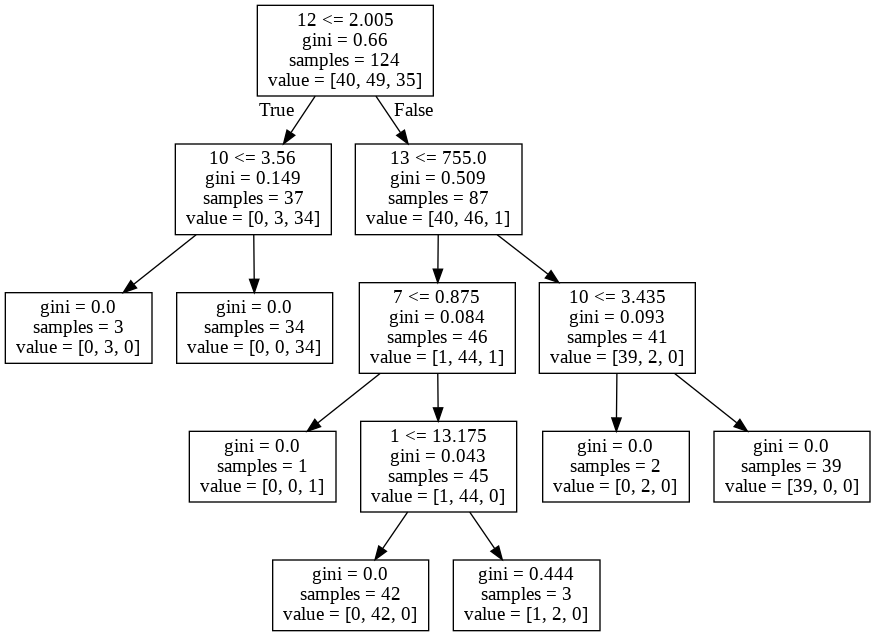

In [15]:
from sklearn.tree import export_graphviz
dot_data = export_graphviz(dtmodel , feature_names=xwinetrain.columns)

from IPython.display import Image
import pydotplus

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [25]:
knntest =[]
knntrain =[]
for i in range(1,15):
  knnmodel = KNeighborsClassifier(n_neighbors=i)
  knnmodel.fit(xwinetrain,ywinetrain)
  knntrain.append(knnmodel.score(xwinetrain,ywinetrain))
  knntest.append(knnmodel.score(xwinetest,ywinetest))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-

In [29]:
knntest

[0.7777777777777778,
 0.7222222222222222,
 0.7407407407407407,
 0.7222222222222222,
 0.6851851851851852,
 0.6851851851851852,
 0.7222222222222222,
 0.6851851851851852,
 0.7592592592592593,
 0.7407407407407407,
 0.7407407407407407,
 0.7037037037037037,
 0.7222222222222222,
 0.6851851851851852]

In [30]:
knntrain


[1.0,
 0.8467741935483871,
 0.8629032258064516,
 0.8306451612903226,
 0.7903225806451613,
 0.782258064516129,
 0.7903225806451613,
 0.782258064516129,
 0.7661290322580645,
 0.7661290322580645,
 0.7419354838709677,
 0.7338709677419355,
 0.7258064516129032,
 0.7096774193548387]

In [31]:
gnbmodel = GaussianNB()
gnbmodel.fit(xwinetrain,ywinetrain)

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [32]:
print(gnbmodel.score(xwinetrain,ywinetrain))
print(gnbmodel.score(xwinetest,ywinetest))

0.9838709677419355
1.0


In [36]:
dfdiabetes= pd.read_csv("/content/diabetes.csv",header = None)
dfdiabetes.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [40]:
xdiabetes = dfdiabetes.drop([8],axis=1)
ydiabetes = dfdiabetes[[8]]
xdiabetes.head()

,0,1,2,3,4,5,6,7
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [41]:
ydiabetes.head()

,8
0,1
1,0
2,1
3,0
4,1


In [46]:
xdtrain,xdtest,ydtrain,ydtest = train_test_split(xdiabetes,ydiabetes,test_size=0.3,random_state=6)

In [47]:
dtmodel.fit(xdtrain,ydtrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [49]:
print(dtmodel.score(xdtrain,ydtrain))
print(dtmodel.predict(xdtest))
print(dtmodel.score(xdtest,ydtest))

0.8249534450651769
[0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0
 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0
 1 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0
 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1
 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 1 1 0 0 0 0
 0 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 1 1 0 0 1 0 1
 1 1 1 0 0 0 0 1 0]
0.7229437229437229


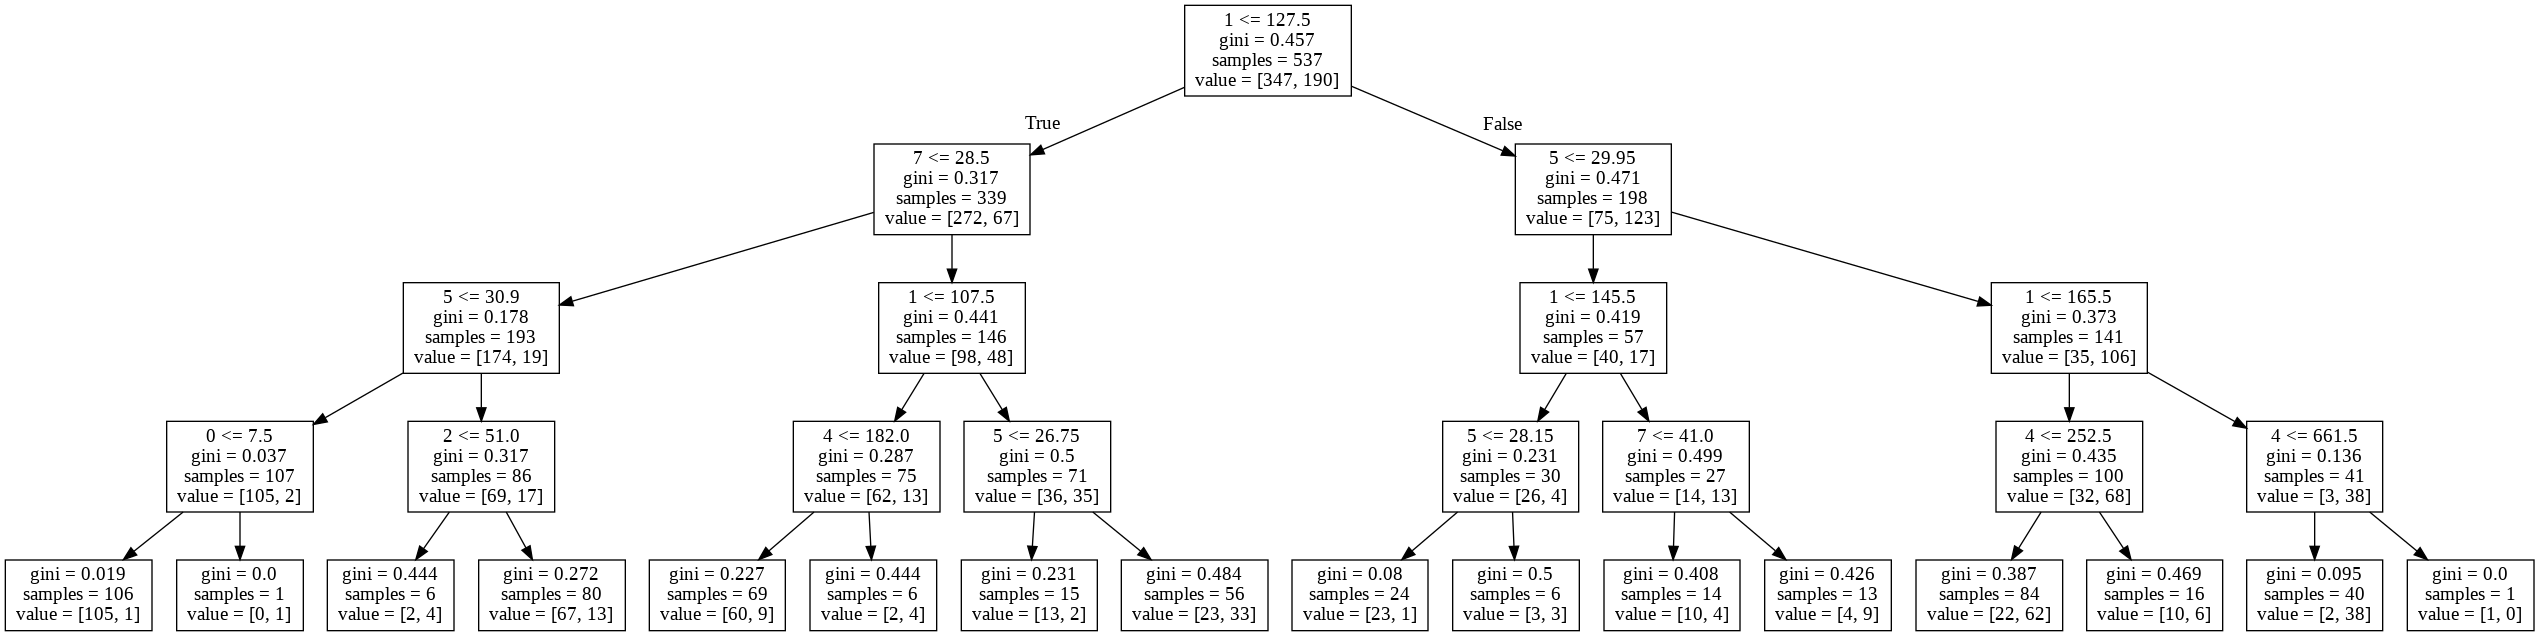

In [50]:
from sklearn.tree import export_graphviz
dot_data2 = export_graphviz(dtmodel , feature_names=xdtrain.columns)

from IPython.display import Image
import pydotplus

graph = pydotplus.graph_from_dot_data(dot_data2)
Image(graph.create_png())

In [52]:
knntest1 =[]
knntrain1 =[]
for i in range(1,15):
  knnmodel = KNeighborsClassifier(n_neighbors=i)
  knnmodel.fit(xdtrain,ydtrain)
  knntrain1.append(knnmodel.score(xdtrain,ydtrain))
  knntest1.append(knnmodel.score(xdtest,ydtest))



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-

In [53]:
print(knnmodel.predict(xdtest))
print(max(knntest1))
print(max(knntest1))

[0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0
 0 1 1 1 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1
 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1
 1 0 1 0 0 0 0 0 0]
0.7662337662337663
0.7662337662337663


In [55]:
gnbmodel = GaussianNB()
gnbmodel.fit(xdtrain,ydtrain)

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [56]:
print(gnbmodel.score(xdtrain,ydtrain))
print(gnbmodel.predict(xdtest))
print(gnbmodel.score(xdtest,ydtest))

0.7541899441340782
[0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0
 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 0
 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0
 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1
 0 1 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0
 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1
 1 1 1 0 0 0 0 1 0]
0.7792207792207793
